# AIot Intellegent Home Project
applied logistic regression to decide window position to prevent from air and light pollution
## Overview
1.Importing necessary libraries. (numpy, pandas, matplotlib, seaborn).<br>
2.Reading in data<br>
3.Data Exploration and Visualization.<br>
4.Feature Engineering<br>.5
Construction of a predictive model( Any machine learning model in Surpervised Learning)<br>6.
Fitting featurized data into the predictive model.<br>7.
Drawing out predictions with test data.
## Dependancies
pip install numpy<br>
pip install pandas<br>
pip install matplotlib<br>
pip install sklearn<br>

Creating a model to open or close the window according to the outside light intensity and PPM of air 

Import all the required libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ds=pd.read_csv("/content/air.csv")

In [3]:
ds

,ppm,intensity,win_pos
0,250,300,1
1,265,789,0
2,123,123,1
3,423,145,0
4,145,658,0
5,236,256,1
6,456,965,0
7,452,145,0
8,789,178,0
9,698,198,0


In [4]:
ds.head()

,ppm,intensity,win_pos
0,250,300,1
1,265,789,0
2,123,123,1
3,423,145,0
4,145,658,0


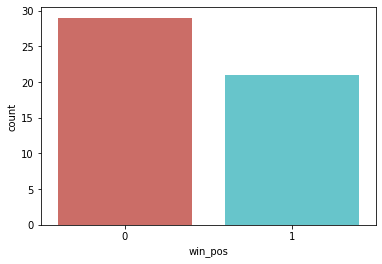

In [6]:
ds.win_pos.value_counts()
sns.countplot(x = 'win_pos', data = ds, palette = 'hls')
plt.show()

divide the dependant and independant variables

In [7]:
ind=ds[['ppm','intensity']]
dep=ds['win_pos']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(ind,dep,test_size=0.20,random_state=0)

In [9]:
lg_rg = LogisticRegression()
lg_rg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred=lg_rg.predict(X_test)

In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4, 0],
       [0, 6]])

visualize the confession matrix using heat map

Text(0.5, 257.44, 'Predicted label')

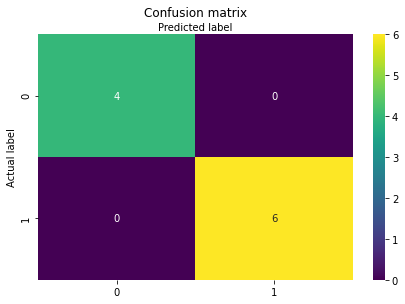

In [19]:
fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


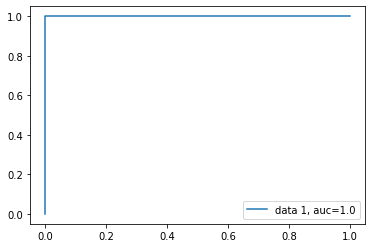

In [17]:
y_pred_proba = lg_rg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [23]:
# give your input
inp=lg_rg.predict(X_test)

In [26]:
res = {'PPM': X_test['ppm'],'Light Intensity':X_test['intensity'], 'window position':inp}
result = pd.DataFrame(res)
result

,PPM,Light Intensity,window position
28,123,243,1
11,156,149,1
10,123,156,1
41,876,14,0
2,123,123,1
27,98,245,1
38,543,257,0
31,345,298,0
22,256,216,1
4,145,658,0


# Lets try to implement support vector machine algorithm(optional because we got good accuracy in logistic regression)